<a href="https://colab.research.google.com/github/vipashaaV321/AI-Assignments/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [ ]:
#Load data
(train_images,train_label),(test_images,test_labels)=datasets.cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0

170500096/170498071 [==============================] - 12s 0us/step


In [ ]:
'''import matplotlib.pyplot as plt
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#display 25 img
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(false)'''


In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
Total params: 37,856
Trainable params: 37,856
Non-trainable params: 0
____________________________________________________

In [ ]:
#faltten
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_images,train_label,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.7661 - accuracy: 0.3277 - val_loss: 1.4996 - val_accuracy: 0.4518
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3468 - accuracy: 0.5101 - val_loss: 1.2667 - val_accuracy: 0.5425
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1999 - accuracy: 0.5667 - val_loss: 1.1530 - val_accuracy: 0.5840
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1158 - accuracy: 0.6030 - val_loss: 1.1469 - val_accuracy: 0.5856
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.0527 - accuracy: 0.6268 - val_loss: 1.0532 - val_accuracy: 0.6255
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9955 - accuracy: 0.6471 - val_loss: 1.0226 - val_accuracy: 0.6405
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9503 - accuracy: 0.6649 - val_loss: 1.0159 -

313/313 [==============================] - 4s 12ms/step - loss: 0.9978 - accuracy: 0.6525


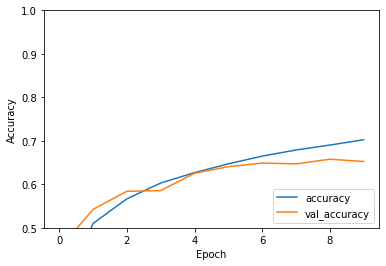

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(test_images,test_labels) 